In [10]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

learning_rate = 1e-4
keep_prob_rate = 0.7 # 
max_epoch = 2000
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # 每一维度  滑动步长全部是 1， padding 方式 选择 same
    # 提示 使用函数  tf.nn.conv2d
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # 滑动步长 是 2步; 池化窗口的尺度 高和宽度都是2; padding 方式 请选择 same
    # 提示 使用函数  tf.nn.max_pool
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])

#  卷积层 1
## conv1 layer ##

W_conv1 = tf.Variable(tf.truncated_normal([7, 7, 1, 32], stddev=0.1)) # patch 7x7, in size 1, out size 32
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # 卷积  自己选择 选择激活函数 -> 选择GELU
h_pool1 = max_pool_2x2(h_conv1) # 池化               

# 卷积层 2
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1)) # patch 5x5, in size 32, out size 64
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # 卷积  自己选择 选择激活函数
h_pool2 = max_pool_2x2(h_conv2) # 池化

#  全连接层 1
## fc1 layer ##
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 全连接层 2
## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# 交叉熵函数
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for i in range(max_epoch):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob:keep_prob_rate})
        if i % 100 == 0:
            print(compute_accuracy(
                mnist.test.images[:1000], mnist.test.labels[:1000]))


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-03-16 15:04:32.361196: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


0.107
0.876
0.914
0.931
0.945
0.95
0.958
0.965
0.962
0.968
0.966
0.969
0.976
0.977
0.975
0.973
0.974
0.979
0.979
0.975


## **⚠️ 问题及解决**
问题：`ModuleNotFoundError: No module named 'tensorflow.data.mnist'`

原因：Tensorflow 2+ 版本没有 `examples.tutorials` 包

**解决**：参考 https://blog.csdn.net/weixin_51355074/article/details/123966213

- 寻找路径和example，在2.16版本中没有找到
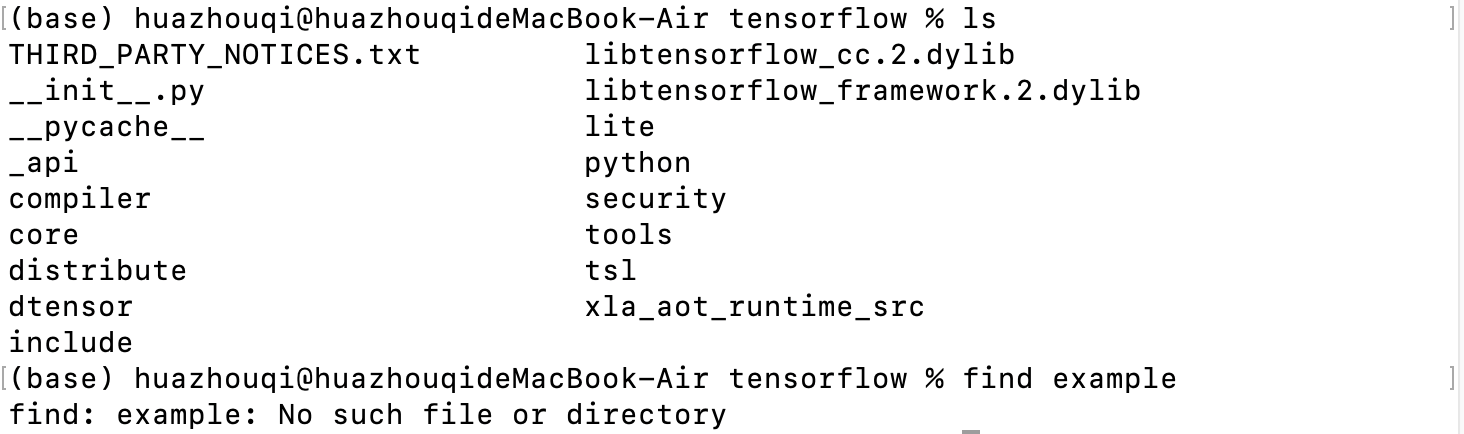

- 下载官方 example 包和 tutorials 包，放入文件夹
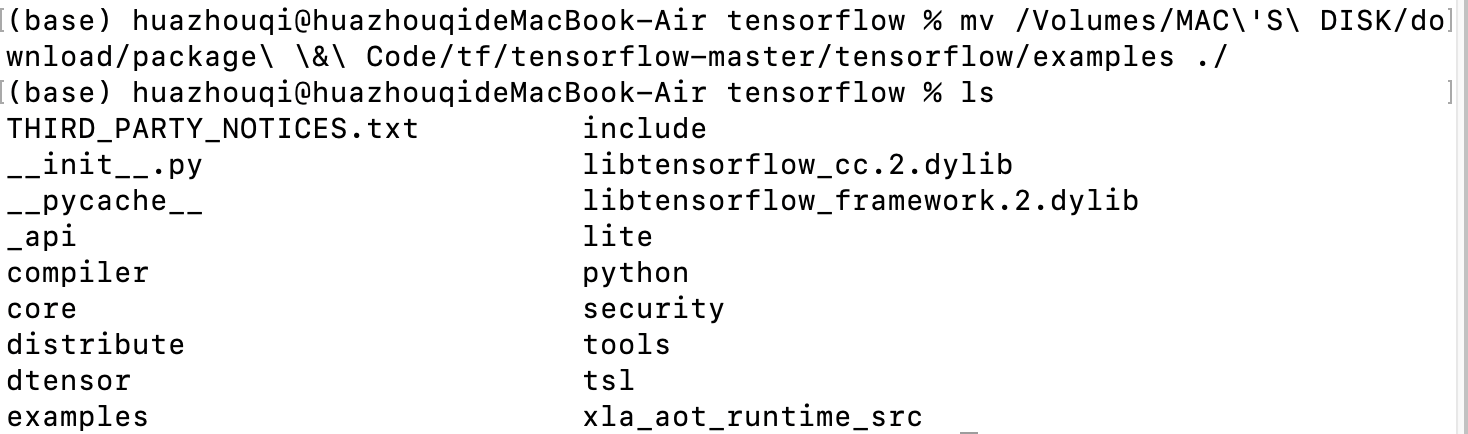
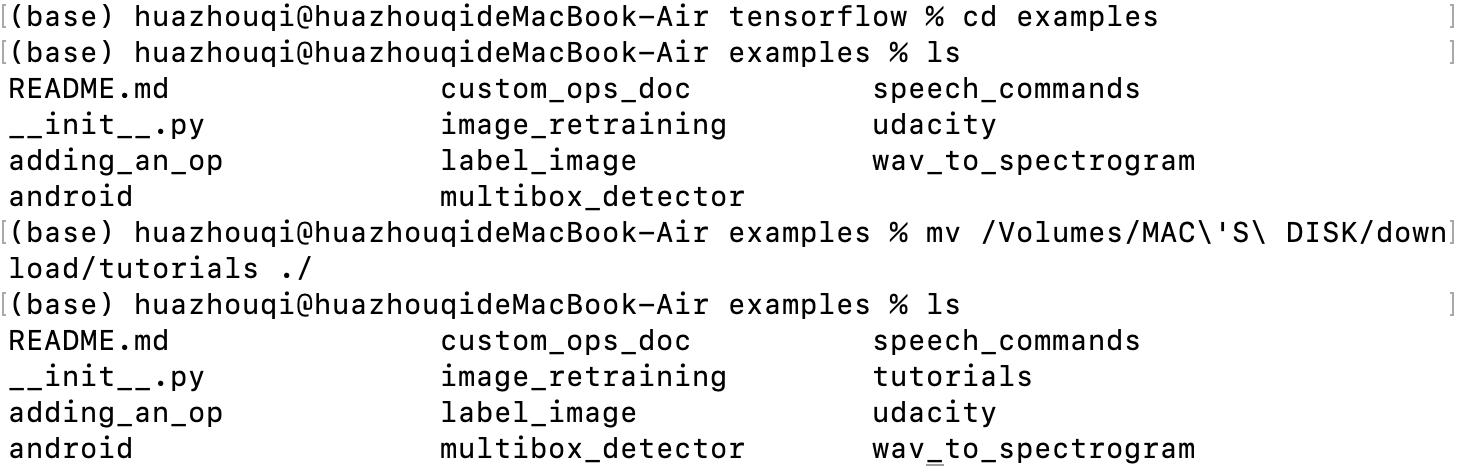


**容易踩坑**：tutorials 包下载解压后其中还是一个压缩包，需要提取内部压缩包至 tutorials 文件夹，或使用命令行操作：
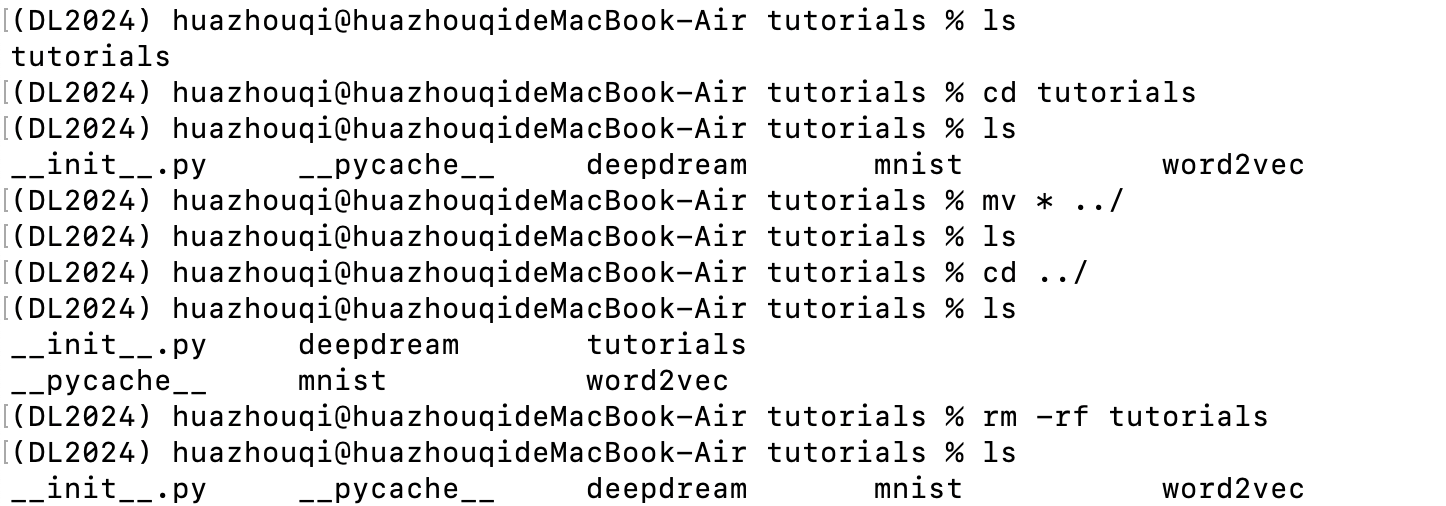

测试：
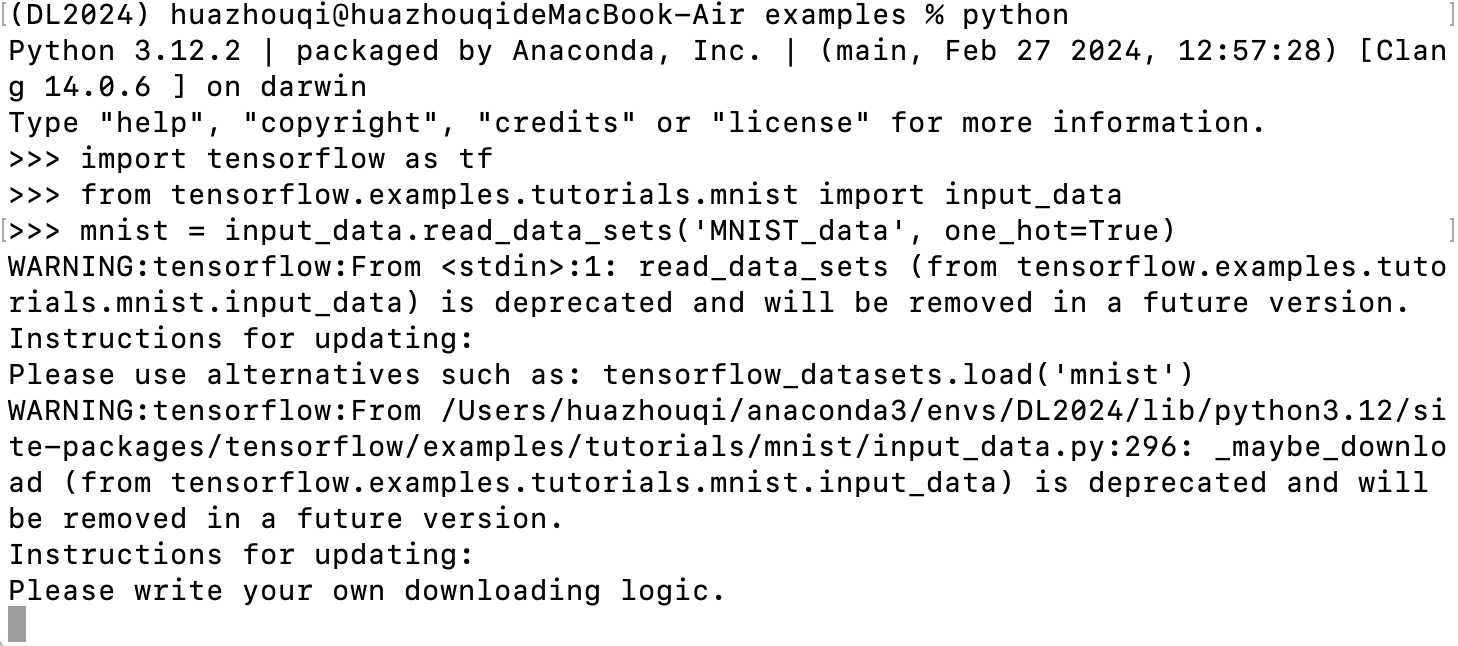

### *大功告成！*

> 后续：发现连 placeholder 模块也没有，所以换成了：
> ```python
>import tensorflow.compat.v1 as tf
>tf.disable_v2_behavior()
>   ```

In [5]:
import tensorflow as tf
print(tf.__version__)
print(tf.__file__)

2.16.0-rc0
/Users/huazhouqi/anaconda3/envs/DL2024/lib/python3.12/site-packages/tensorflow/__init__.py
